# 3次元球面上の最適化 (多様体上での最適化)
$\mathrm{argmin}_{\bf x \in \mathbb{R}^3} - x[2]$

In [1]:
%matplotlib notebook
import pylab as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

import torch
from torch.autograd import Variable

In [14]:
lr = 0.01
nb_epoch = 1000
γ = 1

init_x = np.random.randn(3)
init_x /= np.linalg.norm(init_x)

In [15]:
def grad_f(x, df):
    return torch.matmul(torch.eye(3) - torch.ger(x,x), df)

def R(x,η):
    return (x+η)/torch.norm(x+η)

In [16]:
hist_manifold = []
x = Variable(torch.from_numpy(init_x.copy()).float(), requires_grad=True)
for i in range(nb_epoch):
    hist_manifold.append(x.data.numpy().copy())
    loss = - x[2]
    loss.backward()
    g = grad_f(x.data, x.grad.data)
    x.data = R(x.data, -g * lr)
    x.grad.data.zero_()
hist_manifold = np.array(hist_manifold)

In [17]:
hist_manifold[-1]

array([ -3.78324985e-05,   1.76491212e-05,   1.00000000e+00], dtype=float32)

In [18]:
hist_penalty = []
x = Variable(torch.from_numpy(init_x.copy()), requires_grad=True)
for i in range(nb_epoch):
    hist_penalty.append(x.data.numpy().copy())
    loss = - x[2] + torch.abs(1-torch.dot(x,x)) * γ
    loss.backward()
    x.data -=  x.grad.data * lr
    x.grad.data.zero_()
hist_penalty = np.array(hist_penalty)
hist_penalty[-1]

array([ -4.14869656e-05,   1.93539359e-05,   9.99687340e-01])

<IPython.core.display.Javascript object>


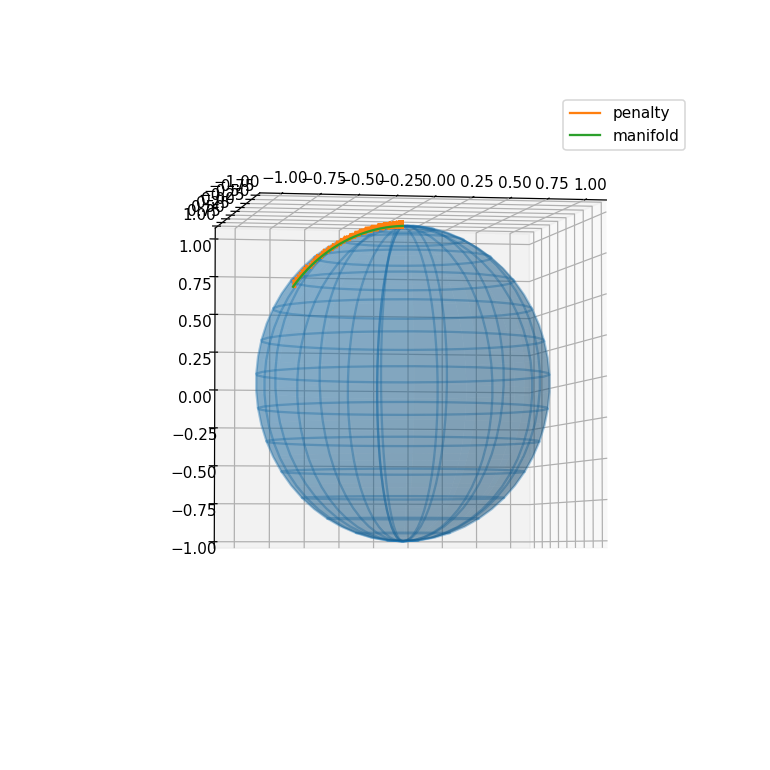

In [19]:
fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection='3d')
u = np.linspace(0, np.pi, 30)
v = np.linspace(0, 2 * np.pi, 30)

x = np.outer(np.sin(u), np.sin(v))
y = np.outer(np.sin(u), np.cos(v))
z = np.outer(np.cos(u), np.ones_like(v))
ax.plot_surface(x, y, z, alpha=0.3)
ax.plot_wireframe(x, y, z, alpha=0.4, rstride=2, cstride=2)
ax.plot(hist_penalty[:,0], hist_penalty[:,1], hist_penalty[:,2], label="penalty")
ax.plot(hist_manifold[:,0], hist_manifold[:,1], hist_manifold[:,2], label="manifold")
plt.legend()
plt.show()